In [1]:
import pandas as pd
import numpy as np

In [2]:
recommended_list = [143, 156, 1134, 991, 27, 1543, 3345, 533, 11, 43] #id товаров
bought_list = [521, 32, 143, 991]

### 1. Hit rate

Hit rate = был ли хотя бы 1 релевантный товар среди рекомендованных

- Иногда применяется, когда продаются достаточно дрогие товары (например, бытовая техника) 

----
Hit rate = (был ли хотя бы 1 релевантный товар среди рекомендованных)   

Hit rate@k = (был ли хотя бы 1 релевантный товар среди топ-k рекомендованных)

In [3]:
def hit_rate(recommended_list, bought_list):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    
    flags = np.isin(bought_list, recommended_list)
    
    hit_rate = (flags.sum() > 0) * 1
    
    return hit_rate

## ДОБАВЛЕНИЯ ПО ДЗ
def hit_rate_at_k(recommended_list, bought_list, k=5):
    
    # your_code
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)[:k]
    
    flags = np.isin(bought_list, recommended_list)
    
    hit_rate = (flags.sum() > 0) * 1
    
    return hit_rate

In [4]:
hit_rate(recommended_list, bought_list)

1

In [5]:
hit_rate_at_k(recommended_list, bought_list, k=1)

1

### 2. Precision

*Precision* - доля релевантных товаров среди рекомендованных = Какой % рекомендованных товаров  юзер купил

- Пожалуй, самая приближенная к бизнес-метрикам и самая популярная метрика

---

Precision= (# of recommended items that are relevant) / (# of recommended items)  

Precision@k = (# of recommended items @k that are relevant) / (# of recommended items @k)

Money Precision@k = (revenue of recommended items @k that are relevant) / (revenue of recommended items @k)  

**Note:** Обычно k в precision@k достаточно невелико (5-20) и определяется из бизнес-логики. Например, 5 товаров в e-mail рассылке, 20 ответов на первой странице google и т.д

In [6]:
recommended_list = [143, 156, 1134, 991, 27] #id товаров
bought_list = [521, 32, 143, 991]
prices_reсommended = [400, 60, 40, 40 , 90]  


In [7]:
## ДОБАВЛЕНИЯ ПО ДЗ
def money_precision_at_k(recommended_list, bought_list, prices_reсommended, k=5):
        
    # your_code
    # Лучше считать через скалярное произведение, а не цикл
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)[:k]
    prices_reсommended = np.array(prices_reсommended)[:k]
    
    flags = np.isin(recommended_list, bought_list)
    print(flags)
    precision = np.sum(flags*prices_reсommended) / np.sum(prices_reсommended)  
    
    return precision

In [8]:
money_precision_at_k(recommended_list, bought_list, prices_reсommended, k=5)

[ True False False  True False]


0.6984126984126984

### 3. Recall

*Recall* - доля рекомендованных товаров среди релевантных = Какой % купленных товаров был среди рекомендованных

- Обычно используется для моделей пре-фильтрации товаров (убрать те товары, которые точно не будем рекомендовать)

---

Recall= (# of recommended items that are relevant) / (# of relevant items)  

Recall@k = (# of recommended items @k that are relevant) / (# of relevant items)

Money Recall@k = (revenue of recommended items @k that are relevant) / (revenue of relevant items)  

    
  
**Note:** в recall@k число k обычно достаточно большое (50-200), больше чем покупок у среднестатистического юзера

In [9]:
def recall(recommended_list, bought_list):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    
    flags = np.isin(bought_list, recommended_list)
    
    recall = flags.sum() / len(bought_list)
    
    return recall

## ДОБАВЛЕНИЯ ПО ДЗ
def recall_at_k(recommended_list, bought_list, k=5):
    
    # your_code
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)[:k]
    
    flags = np.isin(bought_list, recommended_list)
    
    recall = flags.sum() / len(bought_list)
    
    return recall

## ДОБАВЛЕНИЯ ПО ДЗ
def money_recall_at_k(recommended_list, bought_list, prices_recommended, prices_bought, k=5):
    
    # your_code
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)[:k]
    prices_recommended = np.array(prices_recommended)[:k]
    prices_bought = np.array(prices_bought)
    flags = np.isin(recommended_list, bought_list)
    recall = np.sum(flags*prices_recommended) / np.sum(prices_bought)      
    
    return recall

In [10]:
recommended_list = [143, 156, 1134, 991, 27] #id товаров
bought_list = [521, 32, 143, 991]
prices_reсommended = [400, 60, 40, 40 , 90]
prices_bought = [600, 20, 400, 40]

In [11]:
recall_at_k(recommended_list, bought_list, k=5)

0.5

In [12]:
money_recall_at_k(recommended_list, bought_list, prices_reсommended, prices_bought, k=5)

0.41509433962264153

### MAP@k

MAP@k (Mean Average Precision@k)  
Среднее AP@k по всем юзерам
- Показывает средневзвешенную точность рекомендаций

$$MAP@k = \frac{1}{|U|} \sum_u{AP_k}$$
  
|U| - кол-во юзеров

In [25]:
def precision_at_k(recommended_list, bought_list, k=5):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    
    bought_list = bought_list  # Тут нет [:k] !!
    recommended_list = recommended_list[:k]
    
    flags = np.isin(bought_list, recommended_list)
    
    precision = flags.sum() / len(recommended_list)
    
    
    return precision

def ap_k(recommended_list, bought_list, k=5):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    
    flags = np.isin(recommended_list, bought_list)
    
    if sum(flags) == 0:
        return 0
    
    sum_ = 0
    for i in range(0, k-1):
        if flags[i] == True:
            p_k = precision_at_k(recommended_list, bought_list, k=i+1)
            sum_ += p_k
            
    result = sum_ / sum(flags)
    
    return result

In [20]:
recommended_list = [143, 156, 1134, 991, 27]
bought_list_all = [[143,550],
                   [991, 27],
                   [156, 44, 55]]

In [26]:
def map_k(recommended_list, bought_list_all, k=5):
    
    # your_code
    
    ap_sum = np.sum([ap_k(recommended_list, bought_list, k=5) for bought_list in bought_list_all])
    result = ap_sum / len(bought_list_all)
    return result

In [27]:
map_k(recommended_list, bought_list_all, k=5)

0.5416666666666666

### MRR@k
Mean Reciprocal Rank

- Считаем для первых k рекоммендаций
- Найти ранк первого релевантного предсказания $k_u$
- Посчитать reciprocal rank = $\frac{1}{k_u}$

$$MRR = mean(\frac{1}{k_u})$$

In [54]:
recommended_list = [142, 156, 1134, 991, 27, 1543, 3345, 533, 11, 43] #id товаров
bought_list = [521, 32, 143, 991]

def reciprocal_rank_k(recommended_list, bought_list, k=5):
    # your_code
    recommended_list = np.array(recommended_list)[:k]
    bought_list = np.array(bought_list)
    
    flags = np.isin(recommended_list, bought_list)
    ranks = 0
    for i in range(0, k):
        if flags[i]:
            ranks = 1 / (i+1)
            break
                
    return ranks

In [55]:
reciprocal_rank_k(recommended_list, bought_list, k=5)

0.25

### *average_precision для ранжирования по примеру с картинки лекции
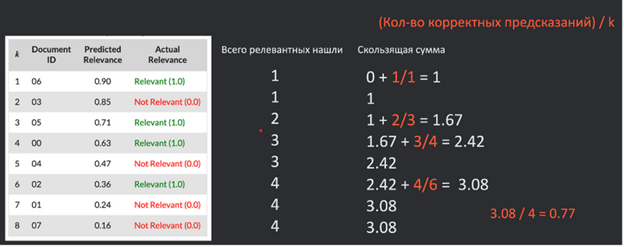


In [28]:
rec_example = [6, 3, 5, 0, 4, 2, 1, 7]
rel_list = [6, 5, 0, 2]


In [39]:
def ap_k(recommended_list, bought_list, k=5):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    
    flags = np.isin(recommended_list, bought_list)
    
    if sum(flags) == 0:
        return 0
    
    sum_ = 0
    n_true = 0
    for i in range(0, k-1):
        if flags[i] == True:
            n_true += 1
            sum_ += round((n_true/(i+1)), 3)
        print(sum_)
    result = sum_ / sum(flags)
    
    return result

In [40]:
ap_k(rec_example, rel_list, k=8)

1.0
1.0
1.667
2.417
2.417
3.0839999999999996
3.0839999999999996


0.7709999999999999